In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("dataset_output/libras_minds/libras_minds_openpose.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,Acontecer,01AcontecerSinalizador01-1.mp4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,Acontecer,01AcontecerSinalizador01-1.mp4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,Acontecer,01AcontecerSinalizador01-1.mp4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,Acontecer,01AcontecerSinalizador01-1.mp4,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,4,Acontecer,01AcontecerSinalizador01-1.mp4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161434,8670,Vontade,20VontadeSinalizador12-5.mp4,162,0.614689,0.910987,0.588928,0.598457,0.922928,0.627919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161435,8671,Vontade,20VontadeSinalizador12-5.mp4,163,0.614785,0.908597,0.584819,0.598921,0.922699,0.580145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161436,8672,Vontade,20VontadeSinalizador12-5.mp4,164,0.614690,0.911093,0.602180,0.598085,0.925853,0.639054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161437,8673,Vontade,20VontadeSinalizador12-5.mp4,165,0.614768,0.910723,0.575162,0.599248,0.924518,0.586799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [61]:
df_video = df[df["video_name"] == "001_001_001.mp4"]
video_frames = df_video["frame"].max()
print(video_frames)
frames_diff = video_frames - target_frames
print(frames_diff)
frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
# frames_to_remove = [video_frames]
frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
# if len(frames_to_remove) < frames_diff:
#     frames_to_remove += [i for i in range(0, len(frames_to_remove) - frames_diff)]
print(frames_to_remove)
new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
new_df

87
-33
[]


,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,1,001_001_001.mp4,0,0.559302,0.943834,0.361916,0.539392,0.984436,0.072649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,1,001_001_001.mp4,1,0.557995,0.944853,0.363025,0.538670,0.990662,0.072256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,1,001_001_001.mp4,2,0.557992,0.945950,0.366478,0.539255,0.989671,0.074984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,1,001_001_001.mp4,3,0.557876,0.945462,0.389607,0.538725,0.984666,0.079201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
4,4,1,001_001_001.mp4,4,0.557848,0.945605,0.395565,0.538737,0.980610,0.080987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,1,001_001_001.mp4,83,0.558347,0.945418,0.398738,0.541337,0.978682,0.123547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
84,84,1,001_001_001.mp4,84,0.558335,0.944465,0.403318,0.541895,0.983771,0.116143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
85,85,1,001_001_001.mp4,85,0.558347,0.944437,0.400255,0.541910,0.983735,0.116103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
86,86,1,001_001_001.mp4,86,0.558266,0.944817,0.405364,0.541950,0.986827,0.097616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


<Axes: >

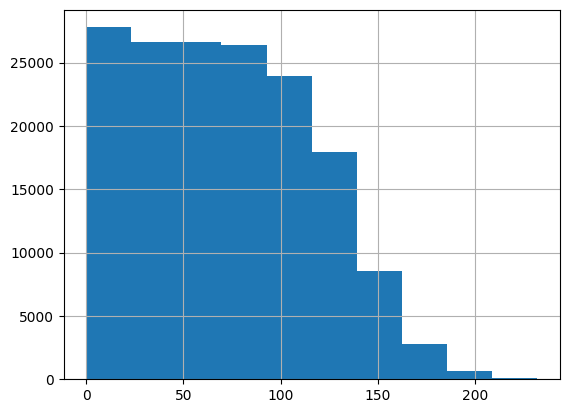

In [4]:
df["frame"].hist()

In [5]:
df["category"].unique()

array(['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala',
       'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho',
       'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina',
       'Vontade'], dtype=object)

<Axes: >

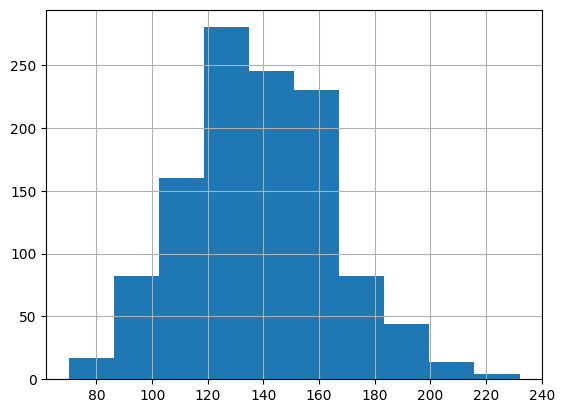

In [6]:
df.groupby("video_name")["frame"].max().hist()

In [7]:
df.groupby("video_name")["frame"].max()

video_name
01AcontecerSinalizador01-1.mp4    103
01AcontecerSinalizador01-2.mp4    128
01AcontecerSinalizador01-3.mp4    119
01AcontecerSinalizador01-4.mp4    119
01AcontecerSinalizador01-5.mp4    130
                                 ... 
20VontadeSinalizador12-1.mp4      157
20VontadeSinalizador12-2.mp4      142
20VontadeSinalizador12-3.mp4      173
20VontadeSinalizador12-4.mp4      131
20VontadeSinalizador12-5.mp4      166
Name: frame, Length: 1158, dtype: int64

In [8]:
df.groupby("video_name")["frame"].max().min()

70

In [9]:
target_frames = 80

In [177]:
df_new_fps = pd.DataFrame(columns=df.columns)
for video_name in df["video_name"].unique():
    df_video = df[df["video_name"] == video_name]
    video_frames = len(df_video)
    if video_frames == target_frames:
        new_df = df_video
    else:
        if video_frames < target_frames:
            new_df = df_video
            last_frame = df_video[df_video["frame"] == video_frames - 1]
            frames_count = target_frames - video_frames
            new_df = pd.concat([last_frame] * frames_count)
            new_df["frame"] = np.arange(video_frames, target_frames)
            new_df = pd.concat([df_video, new_df])
        else:
            frames_diff = video_frames - target_frames
            frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
            if len(frames_to_remove) > frames_diff:
                frames_to_remove = frames_to_remove[:frames_diff]
            if len(frames_to_remove) < frames_diff:
                print("frames diff menor")
            new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
            if len(new_df) > target_frames:
                new_df = new_df.iloc[:target_frames]
            if len(new_df) < target_frames:
                print("menor")
                break
    df_new_fps = pd.concat([df_new_fps, new_df])

In [178]:
df_new_fps

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
1,1,Acontecer,01AcontecerSinalizador01-1.mp4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,Acontecer,01AcontecerSinalizador01-1.mp4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,Acontecer,01AcontecerSinalizador01-1.mp4,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
5,5,Acontecer,01AcontecerSinalizador01-1.mp4,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
6,6,Acontecer,01AcontecerSinalizador01-1.mp4,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161434,8670,Vontade,20VontadeSinalizador12-5.mp4,162,0.614689,0.910987,0.588928,0.598457,0.922928,0.627919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161435,8671,Vontade,20VontadeSinalizador12-5.mp4,163,0.614785,0.908597,0.584819,0.598921,0.922699,0.580145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161436,8672,Vontade,20VontadeSinalizador12-5.mp4,164,0.614690,0.911093,0.602180,0.598085,0.925853,0.639054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161437,8673,Vontade,20VontadeSinalizador12-5.mp4,165,0.614768,0.910723,0.575162,0.599248,0.924518,0.586799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [179]:
df_new_fps["category"].value_counts()

category
Barulho       4960
Acontecer     4800
Vacina        4800
Sapo          4800
Ruim          4800
Maca          4800
Espelho       4800
Vontade       4800
Banco         4800
Bala          4800
Aproveitar    4800
Filho         4480
Banheiro      4400
Cinco         4400
Aluno         4400
Esquina       4400
Medo          4400
America       4400
Amarelo       4400
Conhecer      4400
Name: count, dtype: int64

In [180]:
df_new_fps["category"].unique()

array(['Acontecer', 'Aluno', 'Amarelo', 'America', 'Aproveitar', 'Bala',
       'Banco', 'Banheiro', 'Barulho', 'Cinco', 'Conhecer', 'Espelho',
       'Esquina', 'Filho', 'Maca', 'Medo', 'Ruim', 'Sapo', 'Vacina',
       'Vontade'], dtype=object)

In [181]:
len(df_new_fps["category"].unique())

20

In [182]:
grouped_count = df_new_fps.groupby("video_name")["frame"].count()

In [183]:
grouped_count[grouped_count > target_frames]

Series([], Name: frame, dtype: int64)

In [184]:
grouped_count[grouped_count < target_frames]

Series([], Name: frame, dtype: int64)

In [185]:
video_names = list(grouped_count[grouped_count > target_frames].index)
for video_name in video_names:
    df_video = df_new_fps[df_new_fps["video_name"] == video_name]
    extra_frames = len(df_video) - target_frames
    frames_to_remove = df_video.iloc[-extra_frames:]
    df_new_fps = df_new_fps.drop(frames_to_remove.index)

In [187]:
len(df_new_fps.video_name.unique()) * target_frames

92640

In [188]:
df_new_fps.groupby("video_name")["frame"].count()

video_name
01AcontecerSinalizador01-1.mp4    80
01AcontecerSinalizador01-2.mp4    80
01AcontecerSinalizador01-3.mp4    80
01AcontecerSinalizador01-4.mp4    80
01AcontecerSinalizador01-5.mp4    80
                                  ..
20VontadeSinalizador12-1.mp4      80
20VontadeSinalizador12-2.mp4      80
20VontadeSinalizador12-3.mp4      80
20VontadeSinalizador12-4.mp4      80
20VontadeSinalizador12-5.mp4      80
Name: frame, Length: 1158, dtype: int64

In [189]:
df_new_fps.to_csv(f"dataset_output/libras_minds/libras_minds_openpose_80_frames.csv")